In [10]:
#导入需要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

#导入数据集
store=pd.read_csv(r'D:\XGboost\data\store.csv')
train=pd.read_csv(r'D:\XGboost\data\train.csv',dtype={'StateHoliday':np.string_})
test=pd.read_csv(r'D:\XGboost\data\test.csv',dtype={'StateHoliday':np.string_})
#可以看前几行观察下数据的基本情况

In [11]:
#查看前几行观察商品数据的基本情况
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [12]:
#查看前几行观察训练数据的基本情况
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [14]:
#查看前几行观察测试数据的基本情况
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [15]:
#检查train数据缺失情况
train.isnull().sum()
#无缺失

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [8]:
#test数据缺失情况
test.isnull().sum()
#test数据Open列有缺失

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [16]:
#查看test缺失列都来自于622号店
test[test['Open'].isnull()]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


In [17]:
#查看train里622号店的营业情况
train[train['Store']==622]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
621,622,5,2015-07-31,6306,540,1,1,0,1
1736,622,4,2015-07-30,5412,406,1,1,0,1
2851,622,3,2015-07-29,5326,468,1,1,0,1
3966,622,2,2015-07-28,4966,417,1,1,0,1
5081,622,1,2015-07-27,5413,517,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1012256,622,6,2013-01-05,2350,258,1,0,0,0
1013371,622,5,2013-01-04,3675,399,1,0,0,1
1014486,622,4,2013-01-03,4085,419,1,0,0,1
1015601,622,3,2013-01-02,4080,451,1,0,0,1


In [18]:
#可以认为缺失的部分是应该正常营业的，用1填充
test.fillna(1,inplace=True)

In [19]:
#store列缺失值较多，但数量看来比较一致，看一下是否同步缺失
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [20]:
#下面是观察store缺失的情况
t1='CompetitionDistance'
t2='CompetitionOpenSinceMonth'
t3='CompetitionOpenSinceYear'
t4='Promo2SinceWeek'
t5='Promo2SinceYear'
t6='PromoInterval'


In [16]:
#t2和t3是同时缺失
store[(store[t2].isnull())&(store[t3].isnull())].shape

(354, 10)

In [21]:
#t4,t5,t6也是同时缺失
store[(store[t4].isnull())&(store[t5].isnull())&(store[t6].isnull())].shape

(544, 10)

In [19]:
#a4,a5,a6列缺失是因为没有活动
set(store[(store[t4].isnull())&(store[t5].isnull())&(store[t6].isnull())]['Promo2'])

{0}

In [22]:
#对缺失数据进行填充
#店铺竞争数据缺失，而且缺失的都是对应的。原因不明，而且数量也比较多，如果用中值或均值来填充，有失偏颇。暂且填0，解释意义就是刚开业
#店铺促销信息的缺失是因为没有参加促销活动，所以我们以0填充
store.fillna(0,inplace=True)

<AxesSubplot:title={'center':'Store1'}, xlabel='Date'>

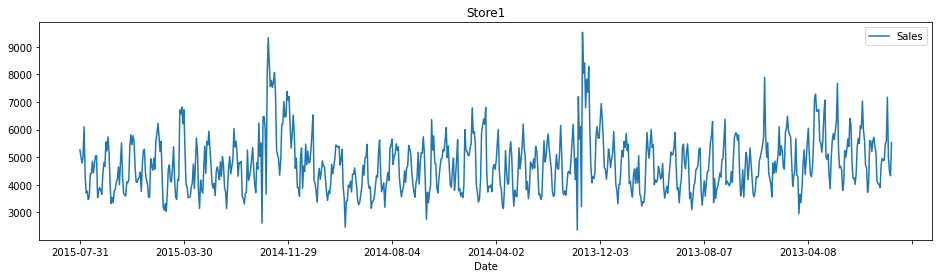

In [23]:
#分析店铺销量随时间的变化
strain=train[train['Sales']>0]
strain.loc[strain['Store']==1,['Date','Sales']].plot(x='Date',y='Sales',title='Store1',figsize=(16,4))
#从图中可以看出店铺的销售额是有周期性变化的，一年中11,12月份销量相对较高，可能是季节因素或者促销等原因
#此外从2014年6-9月份的销量来看，6,7月份的销售趋势与8,9月份类似，而我们需要预测的6周在2015年8,9月份，因此我们可以把2015年6,7月份最近6周的1115家店的数据留出作为测试数据，用于模型的优化和验证

In [24]:
#我们只需要销售额大于0的数据
train=train[train['Sales']>0]
#把store基本信息合并到训练和测试数据集上
train=pd.merge(train,store,on='Store',how='left')
test=pd.merge(test,store,on='Store',how='left')
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 844337
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844338 non-null  int64  
 1   DayOfWeek                  844338 non-null  int64  
 2   Date                       844338 non-null  object 
 3   Sales                      844338 non-null  int64  
 4   Customers                  844338 non-null  int64  
 5   Open                       844338 non-null  int64  
 6   Promo                      844338 non-null  int64  
 7   StateHoliday               844338 non-null  object 
 8   SchoolHoliday              844338 non-null  int64  
 9   StoreType                  844338 non-null  object 
 10  Assortment                 844338 non-null  object 
 11  CompetitionDistance        844338 non-null  float64
 12  CompetitionOpenSinceMonth  844338 non-null  float64
 13  CompetitionOpenSinceYear   84

In [30]:
for data in [train,test]:
#将时间特征进行拆分和转化
    data['year']=data['Date'].apply(lambda x:x.split('-')[0])
    data['year']=data['year'].astype(int)
    data['month']=data['Date'].apply(lambda x:x.split('-')[1])
    data['month']=data['month'].astype(int)
    data['day']=data['Date'].apply(lambda x:x.split('-')[2])
    data['day']=data['day'].astype(int)
#将'PromoInterval'特征转化为'IsPromoMonth'特征，表示某天某店铺是否处于促销月，1表示是，0表示否
#提示下：这里尽量不要用循环，用这种广播的形式，会快很多。循环可能会让你等的想哭
    month2str={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
    data['monthstr']=data['month'].map(month2str)
    data['IsPromoMonth']=data.apply(lambda x:0 if x['PromoInterval']==0 else 1 if x['monthstr'] in x['PromoInterval'] else 0,axis=1)
#将存在其它字符表示分类的特征转化为数字
    mappings={'0':0,'a':1,'b':2,'c':3,'d':4}
    data['StoreType'].replace(mappings,inplace=True)
    data['Assortment'].replace(mappings,inplace=True)
    data['StateHoliday'].replace(mappings,inplace=True)
    #删掉训练和测试数据集中不需要的特征
df_train=train.drop(['Date','Customers','Open','PromoInterval','monthstr'],axis=1)
df_test=test.drop(['Id','Date','Open','PromoInterval','monthstr'],axis=1)
#如上所述，保留训练集中最近六周的数据用于后续模型的测试
Xtrain=df_train[6*7*1115:]
Xtest=df_train[:6*7*1115]
Xtrain.to_csv('D:/XGboost/data1/Xtrain.csv', index=False, encoding='gbk')
Xtest.to_csv('D:/XGboost/data1/Xtest.csv', index=False, encoding='gbk')



<AxesSubplot:>

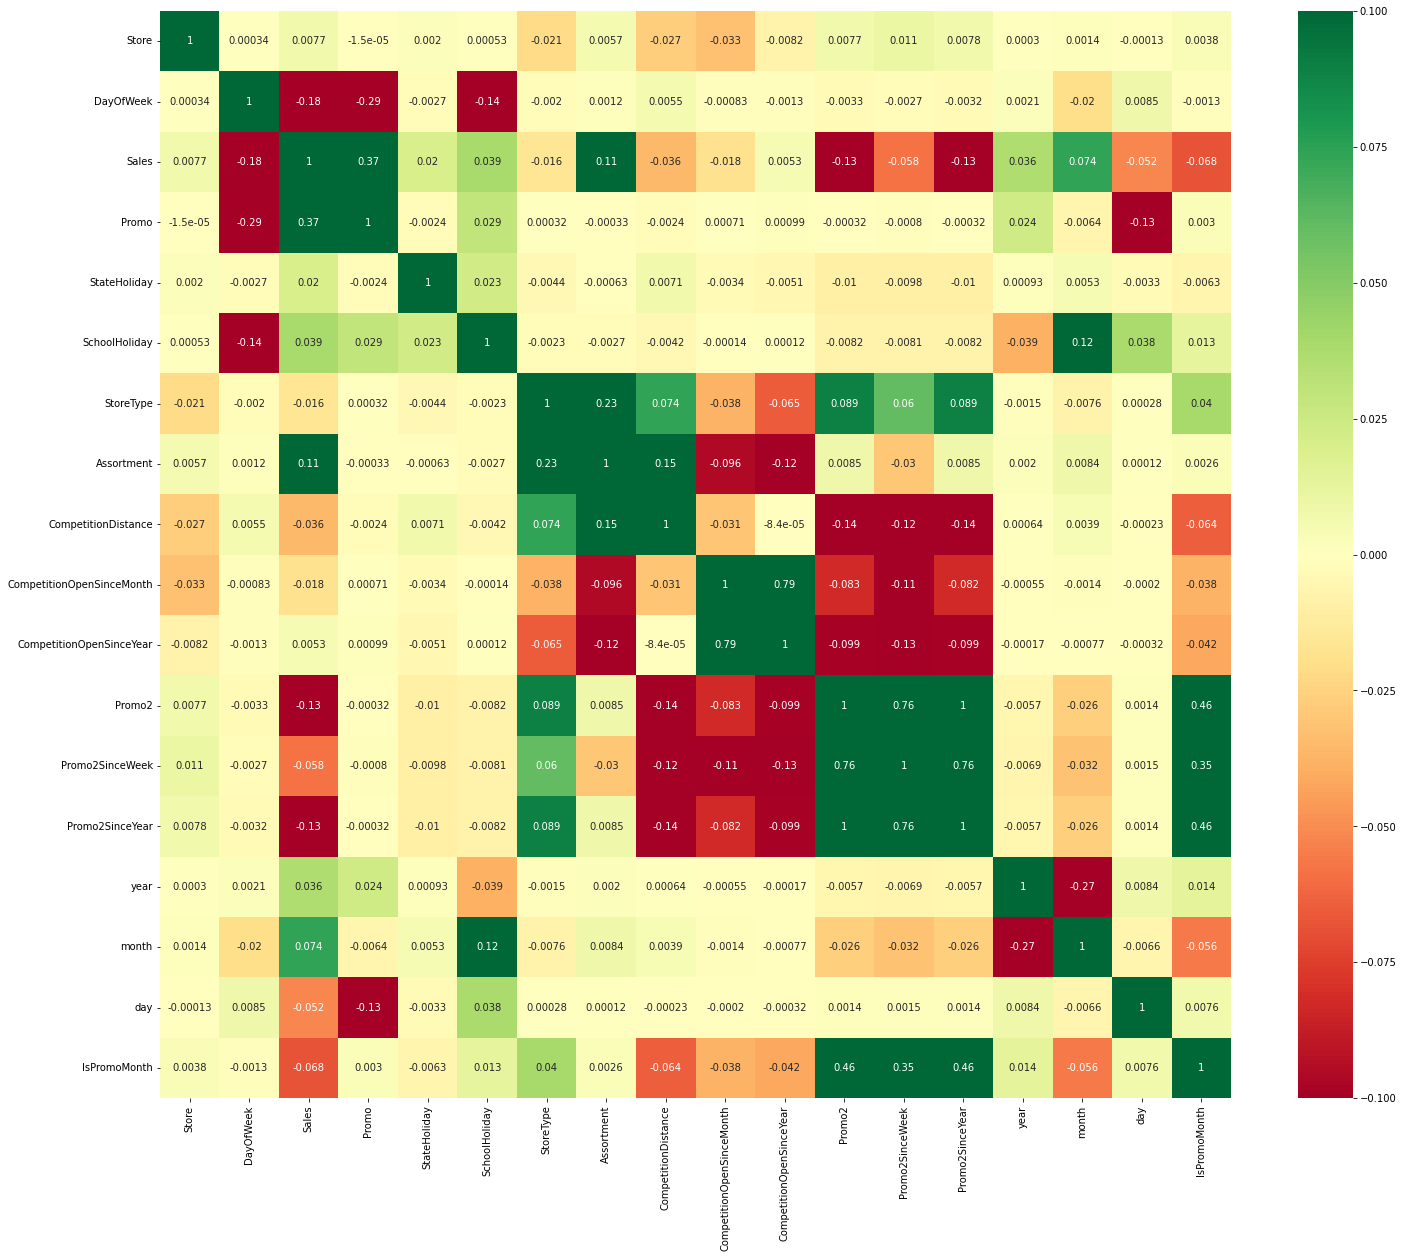

In [27]:
#分析训练数据集中特征相关性
plt.subplots(figsize=(24,20))
sns.heatmap(df_train.corr(),cmap='RdYlGn',annot=True,vmin=-0.1,vmax=0.1,center=0)